In [249]:
import pandas as pd
import numpy as np
import seaborn as sns

In [224]:
# Data ingestion
df = pd.read_csv('Advertising.csv')

In [225]:
# Preview data
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [226]:
# Drop 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [227]:
# Preview the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [228]:
# Checking for shape
df.shape

(200, 4)

In [229]:
# Checking basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [230]:
# Descriptive stats
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [231]:
# Check for columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [232]:
# Check for duplicates
df.duplicated().sum()

0

In [233]:
# Check for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

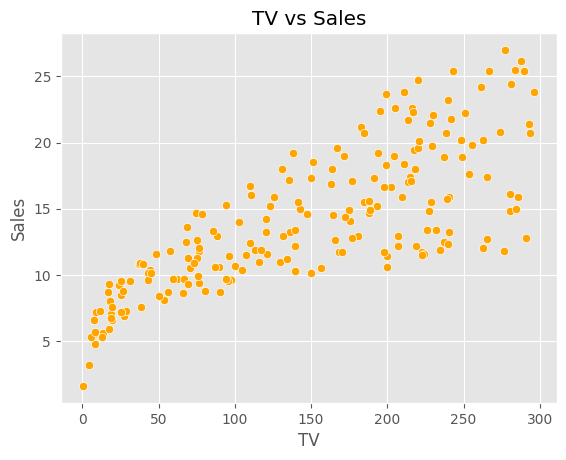

In [234]:
# Visualize data
sns.scatterplot(data=df,x='TV',y='Sales',color='orange')
plt.title('TV vs Sales')
plt.show()

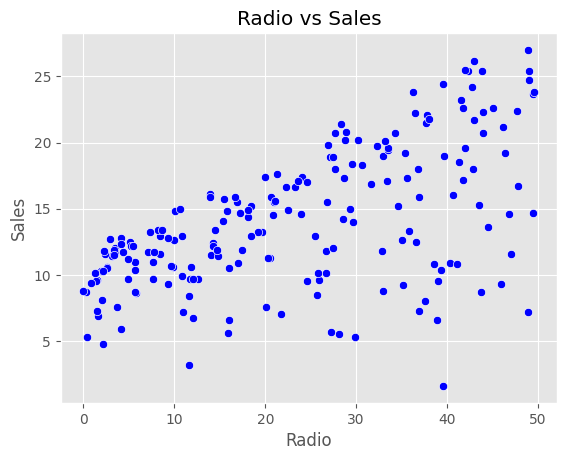

In [235]:
sns.scatterplot(data=df,x='Radio',y='Sales',color='blue')
plt.title('Radio vs Sales')
plt.show()

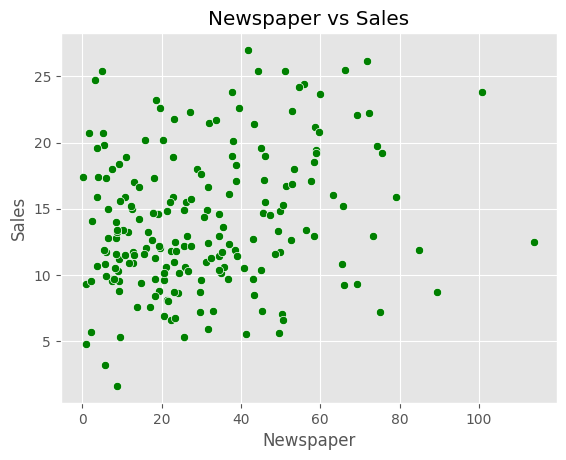

In [236]:
sns.scatterplot(data=df,x='Newspaper',y='Sales',color='green')
plt.title('Newspaper vs Sales')
plt.show()

In [237]:
# Segregating into independent and dependent
x = df.drop(columns=["Sales"])
y = df['Sales']

In [238]:
# Train test and split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [239]:
x_train=x_train.astype(int)
x_test=x_test.astype(int)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [240]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
lr=LinearRegression()

In [242]:

lr.fit(x_train_scaled,y_train)

LinearRegression()

In [243]:
dtr.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [244]:
y_pred=lr.predict(x_test_scaled)

In [245]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8303910270450665

In [246]:
y_pred=dtr.predict(x_test_scaled)
r2_score(y_test,y_pred)

0.8511224891689642

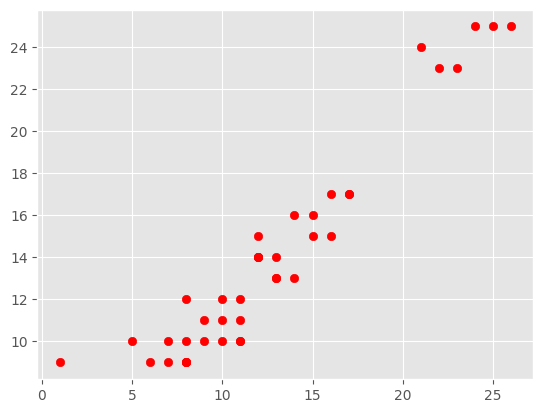

In [247]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='r')

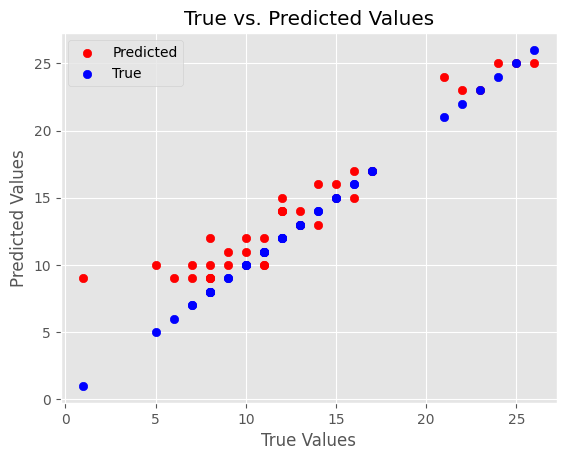

In [248]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='r',label='Predicted')
plt.scatter(y_test,y_test,c='b',label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()